In [1]:
import numpy as np
import sys
import time
import h5py as h5
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\haoyuan\Documents\GitHub\CrystalDiff")

from CrystalDiff import util, pulse, lclsutil, crystal, lightpath

# Get the Crystal Geometries

In [5]:
# ----------------------------------------------------------------------------------------------------------
#                       Step 1: Pulse
# ----------------------------------------------------------------------------------------------------------
energy_center = 10.
pre_length = 1e6

# Set up the pulse
my_pulse = pulse.GaussianPulse3D()
my_pulse.set_pulse_properties(central_energy=energy_center,
                              polar=[0., 1., 0.],
                              sigma_x=708.2581446128465,
                              sigma_y=708.2581446128465,
                              sigma_z=20.,
                              x0=np.array([0., 0., -pre_length]))

# ----------------------------------------------------------------------------------------------------------
#                       Step 3: Delay Lines
# ----------------------------------------------------------------------------------------------------------
# Some meta data for the delay line.
h_length = 2. * np.pi / (1.9201 * 1e-4)

# Some crystal properties
chi0 = complex(-0.97631E-05, 0.14871E-06)
chih_sigma = complex(0.59310E-05, -0.14320E-06)
chihbar_sigma = complex(0.59310E-05, -0.14320E-06)
chih_pi = complex(0.46945E-05, -0.11201E-06)
chihbar_pi = complex(0.46945E-05, -0.11201E-06)

# Bragg angle
bragg = np.radians(18.836) + 10e-6

# Get crystal angles
eta_b1 = np.zeros(1, dtype=np.float64)
theta_b1 = np.array([3 * np.pi / 2. - bragg,])
rho_b1 = theta_b1 + np.pi
tau_b1 = np.zeros(1)

# Initialize the crystals
crystal_list_1 = lclsutil.get_crystal_list(num=1,
                                           hlen=np.array([h_length, ] * 1),
                                           theta=theta_b1,
                                           eta=eta_b1,
                                           rho=rho_b1,
                                           tau=tau_b1,
                                           chi0=chi0,
                                           chih_sigma=chih_sigma,
                                           chihbar_sigma=chihbar_sigma,
                                           chih_pi=chih_pi,
                                           chihbar_pi=chihbar_pi)


number_x = 2
number_y = 2
number_z = 10 ** 5
kx_grid, ky_grid, kz_grid, axis_info = util.get_k_mesh_3d(number_x=number_x,
                                                          number_y=number_y,
                                                          number_z=number_z,
                                                          delta_e_x=1e-50,
                                                          delta_e_y=6e-5,
                                                          delta_e_z=1e-3 / util.c)
kz_grid += my_pulse.klen0

# Apply fft shift
kx_grid = np.zeros(1, np.float64)
number_x = 1
ky_grid = np.zeros(1, np.float64)
number_y = 1
kz_grid = np.ascontiguousarray(kz_grid)

kin_grid = np.zeros((number_z, 3))
kin_grid[:, 2] = kz_grid[:]

# Arrange the crystals

In [6]:
(reflect_s,
 reflect_p,
 kout_grid)= util.get_bragg_reflection_array(kin_grid = kin_grid,
                                        d=crystal_list_1[0].d,
                                        h=crystal_list_1[0].h,
                                        n=crystal_list_1[0].normal,
                                        chi0=crystal_list_1[0].chi0,
                                        chih_sigma=crystal_list_1[0].chih_sigma,
                                        chihbar_sigma=crystal_list_1[0].chihbar_sigma,
                                        chih_pi=crystal_list_1[0].chih_pi,
                                        chihbar_pi=crystal_list_1[0].chihbar_pi)

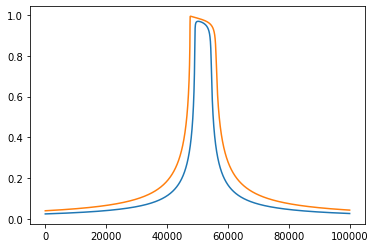

In [8]:
plt.plot(np.abs(reflect_p))
plt.plot(np.abs(reflect_s))

plt.show()